**Chapter 3 – Classification**

_This notebook contains all the sample code and solutions to the exercices in chapter 3._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': u'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
28*28

784

Saving figure some_digit_plot


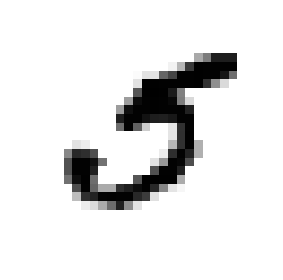

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [5]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [6]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


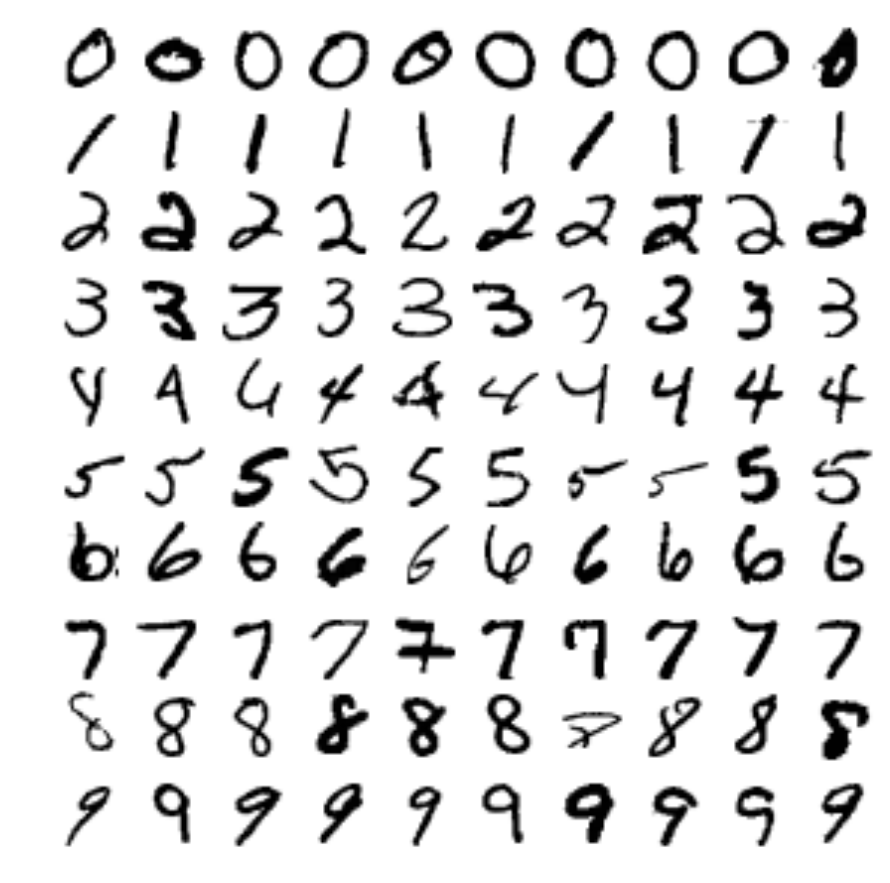

In [9]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [10]:
y[36000]

5.0

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary classifier

In [13]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

NameError: name 'y_train_5' is not defined

In [15]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

NameError: name 'sgd_clf' is not defined

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9502
0.96565
0.96495


In [18]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [19]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.909  ,  0.90715,  0.9128 ])

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]])

In [22]:
y_train_perfect_predictions = y_train_5

In [23]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [24]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.76871350203503808

In [25]:
4344 / (4344 + 1307)

0.7687135020350381

In [26]:
recall_score(y_train_5, y_train_pred)

0.80132816823464303

In [27]:
4344 / (4344 + 1077)

0.801328168234643

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.78468208092485547

In [29]:
4344 / (4344 + (1077 + 1307)/2)

0.7846820809248555

In [30]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 161855.74572176])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [32]:
y_some_digit_pred

array([ True], dtype=bool)

In [33]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [35]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


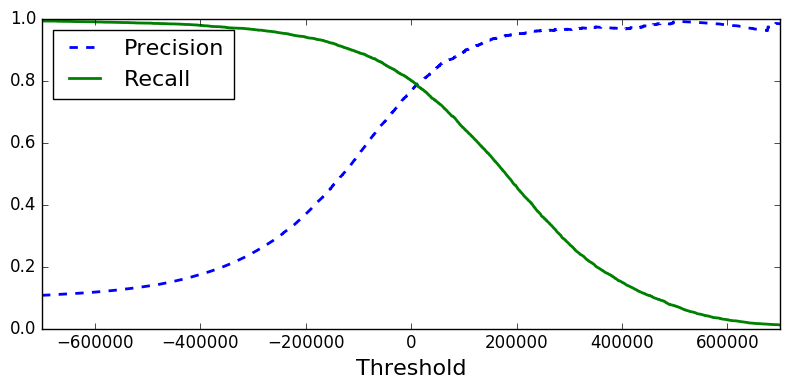

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [37]:
(y_train_pred == (y_scores > 0)).all()

True

In [38]:
y_train_pred_90 = (y_scores > 70000)

In [39]:
precision_score(y_train_5, y_train_pred_90)

0.86592051164915484

In [40]:
recall_score(y_train_5, y_train_pred_90)

0.69931746910164172

Saving figure precision_vs_recall_plot


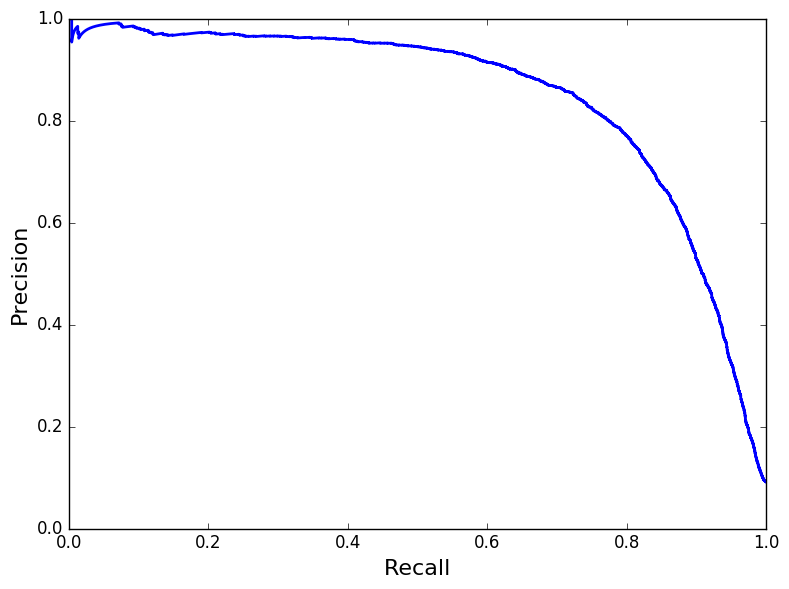

In [41]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

# ROC curves

In [42]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


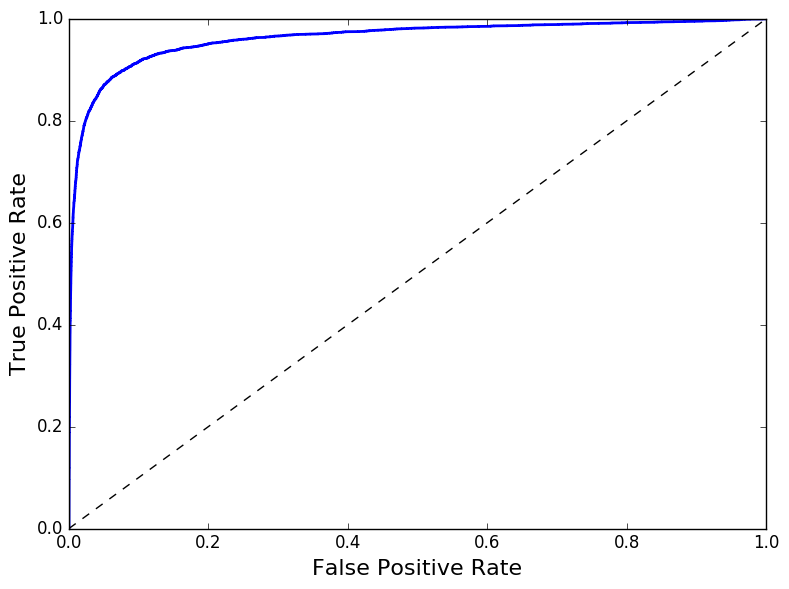

In [43]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.96244965559671547

In [45]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [47]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


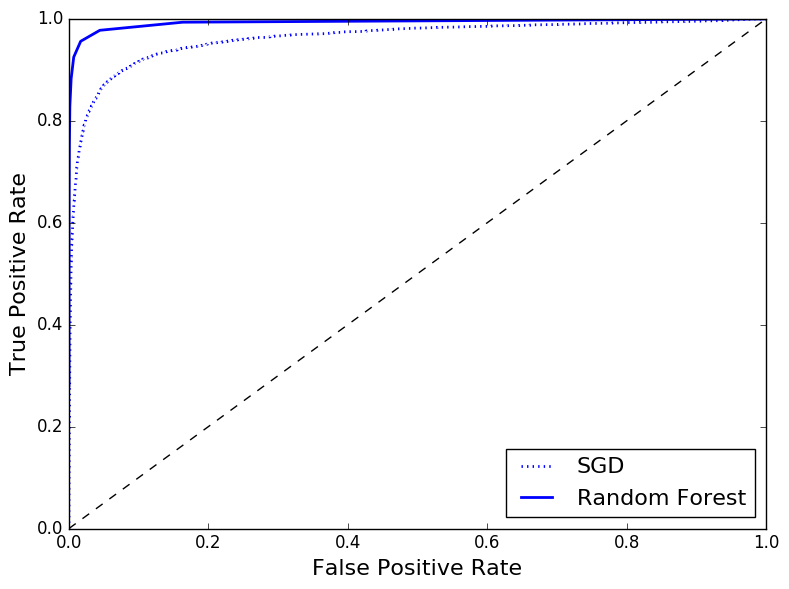

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [49]:
roc_auc_score(y_train_5, y_scores_forest)

0.99312433660038291

In [50]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.98529734474434938

In [51]:
recall_score(y_train_5, y_train_pred_forest)

0.82826046854823832

# Multiclass classification

In [52]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [53]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [54]:
np.argmax(some_digit_scores)

5

In [55]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [56]:
sgd_clf.classes_[5]

5.0

In [57]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([ 5.])

In [58]:
len(ovo_clf.estimators_)

45

In [59]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 5.])

In [60]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0. ,  0. ,  0.1,  0. ,  0.8,  0. ,  0. ,  0. ,  0. ]])

In [61]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.84063187,  0.84899245,  0.86652998])

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.91011798,  0.90874544,  0.906636  ])

In [63]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]])

In [64]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


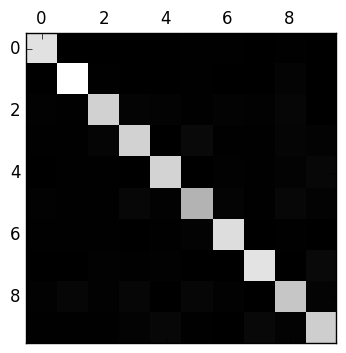

In [65]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [66]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


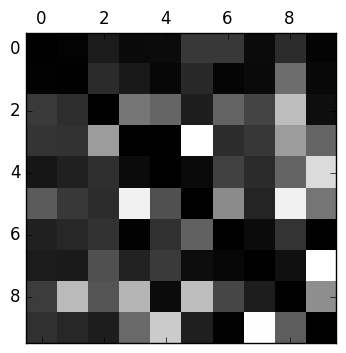

In [67]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


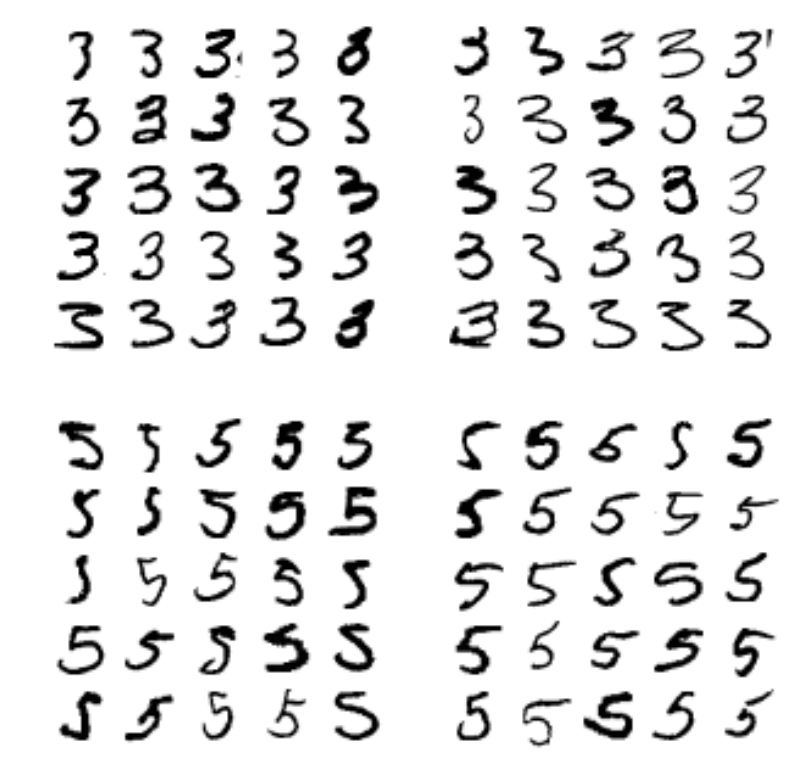

In [68]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel classification

In [69]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

# Multioutput classification

In [78]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


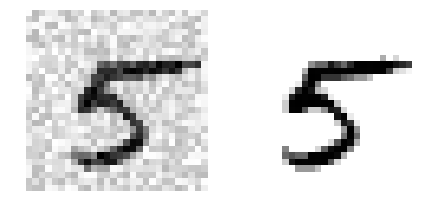

In [79]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure cleaned_digit_example_plot


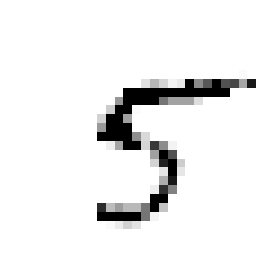

In [82]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

# Extra material

## Dummy (ie. random) classifier

In [67]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

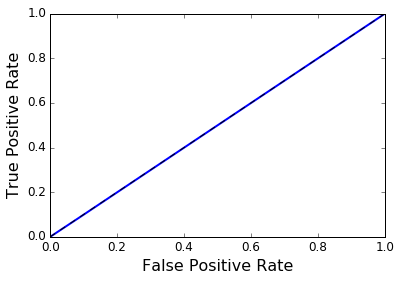

In [68]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

## KNN classifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [70]:
y_knn_pred = knn_clf.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.97140000000000004

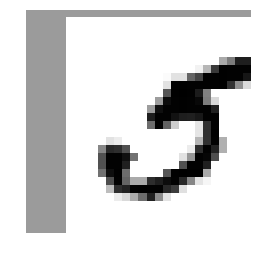

In [72]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [73]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [74]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [75]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [76]:
accuracy_score(y_test, y_knn_expanded_pred)

0.97629999999999995

In [77]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[ 0.       ,  0.       ,  0.5053645,  0.       ,  0.       ,
         0.       ,  0.       ,  0.4946355,  0.       ,  0.       ]])

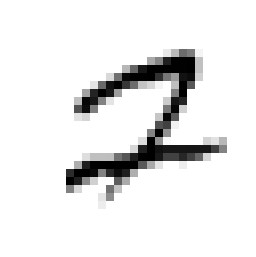

In [78]:
plot_digit(ambiguous_digit)

# Exercise solutions

## 1.

Train a classifier that gets > 99% accuracy on MNIST. This is easy to do with KNN if you grid search for the best hyperparameters.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

X_train_samp = X_train[:10000,]
y_train_samp = y_train[:10000,]

In [51]:
knn_clf = KNeighborsClassifier(n_jobs=-1)
param_grid = dict(weights=['distance', 'uniform'], n_neighbors=[4, 5, 6, 7])
cv = GridSearchCV(knn_clf, param_grid, scoring='accuracy', cv=3, verbose=2)
cv.fit(X_train_samp, y_train_samp)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_neighbors=4, weights=distance .................................
[CV] .................. n_neighbors=4, weights=distance, total=  11.2s
[CV] n_neighbors=4, weights=distance .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.1s remaining:    0.0s


[CV] .................. n_neighbors=4, weights=distance, total=  10.5s
[CV] n_neighbors=4, weights=distance .................................
[CV] .................. n_neighbors=4, weights=distance, total=  12.7s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ................... n_neighbors=4, weights=uniform, total=  11.7s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ................... n_neighbors=4, weights=uniform, total=  11.2s
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ................... n_neighbors=4, weights=uniform, total=  11.2s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=  11.4s
[CV] n_neighbors=5, weights=distance .................................
[CV] .................. n_neighbors=5, weights=distance, total=  11.2s
[CV] n_neighbors=5, weights=distance .................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 13.3min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [4, 5, 6, 7], 'weights': [u'distance', u'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=u'accuracy', verbose=2)

In [52]:
import pandas as pd 

print('Best hyperparameters: %s' % cv.best_params_)
pd.DataFrame(cv.cv_results_).sort_values('rank_test_score').head()

Best hyperparameters: {'n_neighbors': 4, 'weights': u'distance'}


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.268110,11.202423,0.9448,1.00000,4,distance,"{u'n_neighbors': 4, u'weights': u'distance'}",1,0.940030,1.000000,0.945095,1.000000,0.949280,1.000000,0.042803,0.941920,0.003782,0.000000
2,0.226482,11.302828,0.9429,1.00000,5,distance,"{u'n_neighbors': 5, u'weights': u'distance'}",2,0.939130,1.000000,0.944194,1.000000,0.945378,1.000000,0.003723,0.354061,0.002710,0.000000
4,0.242589,10.815222,0.9427,1.00000,6,distance,"{u'n_neighbors': 6, u'weights': u'distance'}",3,0.937931,1.000000,0.945095,1.000000,0.945078,1.000000,0.019644,0.141226,0.003373,0.000000
3,0.226629,10.830437,0.9397,0.96145,5,uniform,"{u'n_neighbors': 5, u'weights': u'uniform'}",4,0.936732,0.963691,0.941794,0.960702,0.940576,0.959958,0.005759,0.183875,0.002158,0.001613
1,0.242200,11.102259,0.9393,0.96460,4,uniform,"{u'n_neighbors': 4, u'weights': u'uniform'}",5,0.933433,0.964291,0.941194,0.965052,0.943277,0.964457,0.017821,0.200227,0.004236,0.000327


## 2.  
Write a function to shift an MNIST image in any direction by one pixel. For each training image, create 4 shifted copies and add them to the training set. Train your best model on this expanded training set and measure test accuracy.

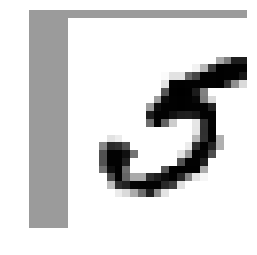

In [10]:
from scipy.ndimage.interpolation import shift

def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [11]:
def add_shifted_imgs(X, y):
    nrows, ncols = X.shape
    assert y.shape[0] == nrows, 'X and y have different numbers of rows.'
    X_new = X
    shift_dirs = [(1,0), (-1,0), (0,1), (0,-1)]
    for dx, dy in shift_dirs:
        X_shifted = np.zeros((nrows, ncols))
        for i in range(nrows):
            X_shifted[i, :] = shift_digit(X[i, :], dx, dy)
        X_new = np.r_[X_new, X_shifted]
    y_new = np.r_[y, y, y, y, y]
    return X_new, y_new



In [12]:
# Add shifted images
X_train_plus, y_train_plus = add_shifted_imgs(X_train_samp, y_train_samp)
print(X_train_plus.shape)

(50000, 784)


In [13]:
# Randomize the order of the rows
ixs = np.random.permutation(X_train_plus.shape[0])
X_train_plus = X_train_plus[ixs,:]
y_train_plus = y_train_plus[ixs]

In [15]:
# Check CV accuracy on a sample of my training data

n_samples = 20000
# knn_clf2 = cv.best_estimator_ # I lost my cv object because I didn't pickle it!
knn_clf2 = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
cross_val_score(knn_clf2, X_train_plus[:n_samples,:], y_train_plus[:n_samples], scoring='accuracy', n_jobs=-1, cv=3)

array([ 0.95111711,  0.94974497,  0.94463616])

[[ 1.  6.  6.  1.  1.  8.  2.  2.  1.  5.]
 [ 8.  3.  0.  3.  7.  4.  4.  7.  3.  5.]
 [ 4.  7.  4.  2.  5.  9.  3.  0.  8.  2.]
 [ 8.  1.  7.  4.  8.  6.  7.  4.  3.  0.]
 [ 8.  4.  9.  9.  5.  0.  6.  1.  7.  1.]
 [ 7.  0.  3.  6.  1.  2.  9.  7.  4.  7.]
 [ 4.  2.  1.  7.  4.  1.  9.  9.  6.  2.]
 [ 5.  8.  8.  8.  0.  6.  0.  2.  1.  3.]
 [ 0.  3.  4.  8.  0.  0.  3.  3.  8.  6.]
 [ 1.  1.  0.  5.  4.  7.  5.  6.  6.  1.]]


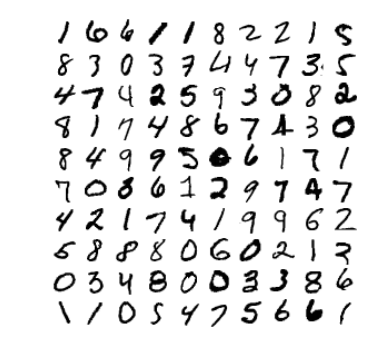

In [96]:
# Compare digit labels and digit pictures

print(y_train_plus[10000:10100].reshape(-1,10))
plot_digits(X_train_plus[10000:10100,])

In [18]:
# Check accuracy on test set
from sklearn.metrics import accuracy_score

knn_clf2.fit(X_train_plus[:n_samples,:], y_train_plus[:n_samples])
knn2_preds = knn_clf2.predict(X_test)
accuracy_score(y_test, knn2_preds)

0.95040000000000002

In [37]:
# Where do I make the most errors?
# Note: in the future I suppose I should check this stuff on the train set, rather than test

from sklearn.metrics import confusion_matrix
import seaborn as sns

def cnf_heatmap(cnf_matrix, metric, class_labels):
    '''
    Plots heatmap of model precision or recall based on a confusion matrix.
    
    cnf_matrix: numpy array, the output of confusion_matrix()
    metric: 'precision' or 'recall'
    class_labels: labels for your classes. These will be sorted to alphabetical order to
                  match the output of confusion_matrix()
    '''
    class_labels = sorted(class_labels)
    
    if metric == 'recall':
        output_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        np.fill_diagonal(output_matrix, 0)
        cmap = 'Blues'
        ylbl = 'True Label'
        xlbl = 'Predicted Label'
        title = 'Model Recall'
        
    if metric == 'precision':
        output_matrix = cnf_matrix.T.astype('float') / cnf_matrix.T.sum(axis=1)[:, np.newaxis]
        np.fill_diagonal(output_matrix, 0)
        cmap = 'Oranges'
        ylbl = 'Predicted Label'
        xlbl = 'True Label'
        title = 'Model Precision'

    sns.heatmap(output_matrix, annot=True, cmap=cmap, xticklabels=class_labels, yticklabels=class_labels)
    plt.ylabel(ylbl)
    plt.xlabel(xlbl)
    plt.title(title)

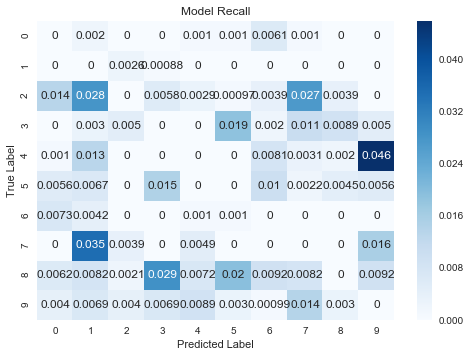

In [38]:
cm = confusion_matrix(y_test, knn2_preds)
cnf_heatmap(cm, 'recall', np.arange(10).astype(str))

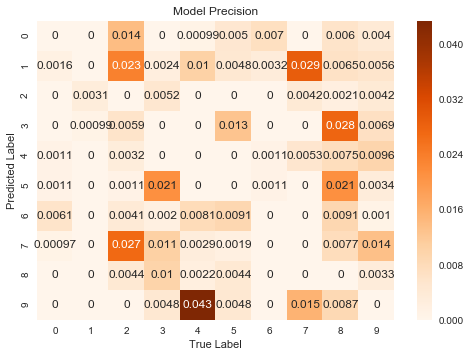

In [39]:
cnf_heatmap(cm, 'precision', np.arange(10).astype(str))

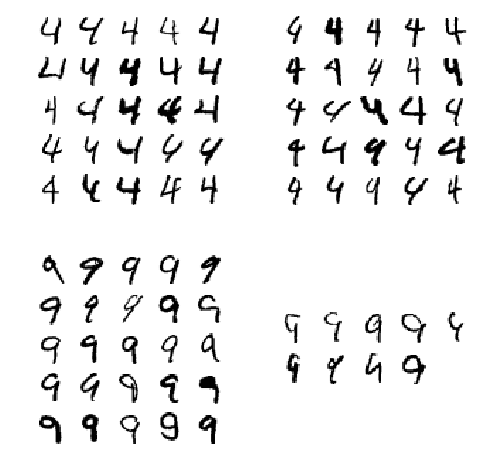

In [45]:
# Let's further investigate the 9/4 confusion

fourfour = X_test[(y_test == 4) & (knn2_preds == 4)]
fournine = X_test[(y_test == 4) & (knn2_preds == 9)]
ninenine = X_test[(y_test == 9) & (knn2_preds == 9)]
ninefour = X_test[(y_test == 9) & (knn2_preds == 4)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(fourfour[:25], images_per_row=5)
plt.subplot(222); plot_digits(fournine[:25], images_per_row=5)
plt.subplot(223); plot_digits(ninenine[:25], images_per_row=5)
plt.subplot(224); plot_digits(ninefour[:25], images_per_row=5)

Top: Fours called Fours, Fours called Nines  
Bottom: Nines called Nines, Nines called Fours  

As indicated by the Recall heatmap, Fours called Nines are a common error, but Nines called Fours are not so common.  

It would probably be better if the model paid attention to the right side of the Four, where the line sticks out. This is an obvious differentiator between Fours and Nines.

What if i computed the average vector for each number in my train set, and then computed the distance of each observation to the average? I could use this as another feature in an ensemble model.

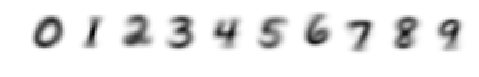

In [72]:
# What does the average vector for each number look like?
import pandas as pd

avg_nums = pd.DataFrame(X_train_plus).groupby(y_train_plus).mean().as_matrix()
plot_digits(avg_nums)

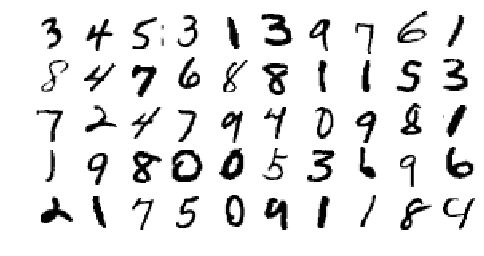

In [86]:
from sklearn.metrics.pairwise import euclidean_distances

# Let's look at some training digits
X_samp = X_train_plus[:50, :]
plot_digits(X_train_plus[:50, :])

In [94]:
# My idea doesn't work so well. The 9 in middle of the bottom row is closest to the average 4 vector!

for i, num in enumerate(avg_nums):
    print(i, ': ', euclidean_distances(X_samp[45,:].reshape(1,-1), num.reshape(1,-1)))

0 :  [[ 2415.39563584]]
1 :  [[ 2650.35190426]]
2 :  [[ 2256.20190326]]
3 :  [[ 2243.04377995]]
4 :  [[ 1884.33655623]]
5 :  [[ 2267.97300811]]
6 :  [[ 2190.32745468]]
7 :  [[ 2262.91412998]]
8 :  [[ 2191.5964723]]
9 :  [[ 1924.75029124]]


In [91]:
y_train_plus[45]

9.0

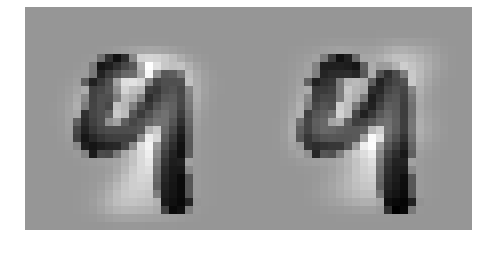

In [133]:
# Even though x is a 9, we can see that it differs from the average 9 in that it is not very diagonal.
# x is unfortunately more in line with the average 4.
x_nine_diff = X_samp[45,:]-avg_nums[9]
x_four_diff = X_samp[45,:]-avg_nums[4]

plot_digits(np.vstack((x_nine_diff, x_four_diff)))

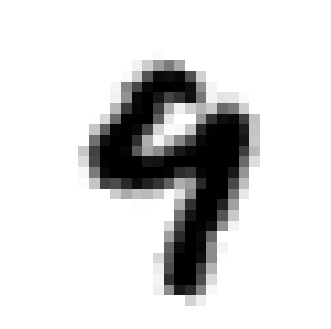

In [131]:
# One idea is to augment the data with rotated images. For example, I can rotate this 9 to be more diagonal:
from skimage.transform import rotate

plot_digit(rotate(X_samp[45,:].reshape(28,28), -20))

Image rotation would solve my problem, but I don't know which direction to rotate each image! If I take a rotated image and rotate it further, I will make my data even noisier.  

In this [paper](https://stackoverflow.com/questions/37094371/handwritten-digit-recognition-pre-processing-rotation), instead of augmenting the data set with extra rotations, data scientists identified whether each image was rotated, and then reversed the rotations so that all images were un-rotated. This involves calculating a bounding box for each image and then trying different rotations to see which minimizes the width of the bounding box. This would be a good project for the future.